# **TP SI221: k-Nearest Neighbours Algorithm**

This is the report from **Wassim Lakehal** and **Théo Rouvet**. We start by importing the relevant libraries.

In [0]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.linalg import norm

## **Part 1 - K-NN classification : Synthetic dataset**

We consider a data set $ \{x_i, y_i \}_{i=1}^{300}$ so that $y_i$ is uniformly generated on $\{0,1,2\}$, $x_i \sim N(\mu, \sigma^2I)$ and $x_i \in \mathbb{R}^2$, where:
* $\mu = (-1,0)$, if $y_i=0$
* $\mu = (1,0)$, if $y_i=1$
* $\mu = (0,1)$, if $y_i=2$

We then split the data set in two groups: $\frac{2}{3}$ for training purposes and $\frac{1}{3}$ for test purposes.


### **Question 1**

In [0]:
def generator(sigma2 = 0.1, n = 300): # Let us generate the dataset

  X = np.zeros((n,2))
  y = np.zeros(n)

  shuffle = np.arange(n)
  np.random.shuffle(shuffle)

  for i in shuffle[:n//3] :
    x = np.sqrt(sigma2) * np.random.randn(2)

    x[0] -= 1 # 
    x[1] += 0 # We center in (-1,0)
    X[i] = x
    y[i] = 0

  for i in shuffle[n//3:2*n//3] :
    x = np.sqrt(sigma2) * np.random.randn(2)

    x[0] += 1 # 
    x[1] += 0 # We center in (1,0)
    X[i] = x
    y[i] = 1

  for i in shuffle[2*n//3:]:
    x = np.sqrt(sigma2) * np.random.randn(2)

    x[0] += 0 #
    x[1] += 1 # We center in (0,1)
    X[i] = x
    y[i] = 2
  
  return X, y 

Having created the generation function corresponding to the situation, we plot the data obtained, which should be located around 3 main points, of coordinates : (1,0), (-1,0) and (0,1).

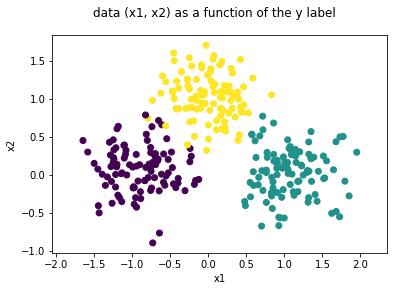

In [3]:
X,y = generator()
fig = plt.figure()
fig.suptitle('data (x1, x2) as a function of the y label')
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

Hence the data is properly generated. 

We can then implement a function to split the data set into training and test sets, with some shuffling of the data.

In [0]:
def split(X, y, training_proportion = 2/3): # Our version of the train_test_split algorithm
  n = X.shape[0]

  shuffle = np.arange(n)
  np.random.shuffle(shuffle)

  p = int(n*training_proportion)

  X_train, y_train, X_test, y_test = X[shuffle[:p]], y[shuffle[:p]], X[shuffle[p:]], y[shuffle[p:]]
  
  return X_train, X_test, y_train, y_test

We then implement the **k-NN algorithm**.

In [0]:
def kNN(X_train, y_train, X_test, K):
  n = X_test.shape[0]
  y_predict = np.zeros(n)

  # matrix s.t. on the line i we have a list of the indices of the K closest neighbours to X_i
  for i in range(n):
    neighbours = norm(X_train-X_test[i], axis = 1).argsort()[1:K+1]
    # list of indices of R^2 data points, the first point is i so we do not consider it
    
    neighbours_label = list(y_train[neighbours.astype('int')])

    ## get the most common label among the neighbours 
    y_predict[i] =  max(neighbours_label, key=neighbours_label.count)

  return y_predict

We can then plot the result for various values of K, comparing the contours of the classification with the labels of the test set.

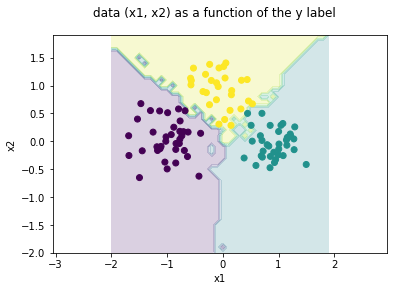

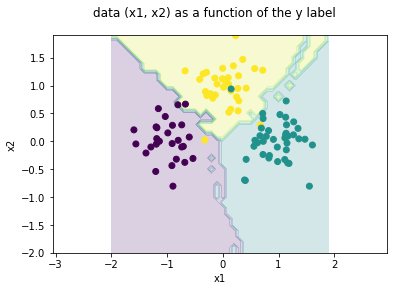

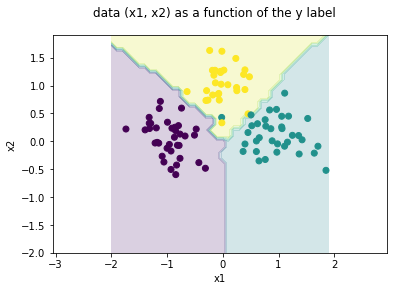

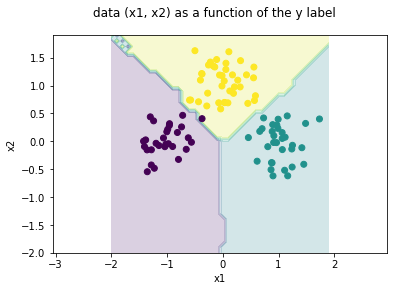

In [6]:
K = [1, 2, 5, 10]
for k in K:
  X,y = generator()
  X_train, X_test, y_train, y_test = split(X, y)

  x1, x2 = np.meshgrid(np.arange(-2, 2, .1),
                      np.arange(-2, 2, .1))
  xx = np.c_[x1.ravel(), x2.ravel()] # On crée tous les couples possibles sur -2, 2

  fig = plt.figure()
  fig.suptitle('data (x1, x2) as a function of the y label')

  Z = kNN(X_train, y_train, xx, k)
  Z = Z.reshape(x1.shape)
  plt.contourf(x1, x2, Z, alpha=0.2)

  plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.axis('equal')
  plt.show()

### **Question 2**

We then seek to compute the average error as well as the standard deviation of the K-NN classification method, for various values of $\sigma^2$ and various values of $K$.

We start with $\sigma^2 = 0.05$ and $K=5$, and we define a function that computes the average error.

In [0]:
X, y = generator(0.05)
K = 5

def average_error(X, y, K):
  X_train, X_test, y_train, y_test = split(X, y)
  y_pred = kNN(X_train,y_train,X_test,K).astype('int')
  
  return np.sum(y_test!=y_pred)/X_test.shape[0]

We then apply this function to this case, computing $e(\sigma^2,K)$ and $s(\sigma^2,K)$.

In [8]:
sigma2 = 0.05
K = 5
iterations = 50

averageerror = np.zeros(iterations)

for k in range(iterations):
  X, y = generator(sigma2)
  averageerror[k] = average_error(X,y,K)

print("Average error for sigma2 =", sigma2, ":", np.mean(averageerror)) 
print("Standard deviation of average error for sigma2 =", sigma2, ":", np.std(averageerror))
print()

Average error for sigma2 = 0.05 : 0.0014000000000000002
Standard deviation of average error for sigma2 = 0.05 : 0.0034698703145794943



We extend the previous algorithm for various $\sigma^2$ and various $K$, so as to generalise the error computation as well as the standard deviation computation.

In [9]:
sigma2 = [0.1, 0.15, 0.2, 0.25]
K = [1,2,10]

print("Average errors and standard deviations:")
print()

for s in sigma2:
  for k in K:
    iterations = 50

    averageerror = np.zeros(iterations)

    for index in range(iterations):
      X, y = generator(s)
      averageerror[index] = average_error(X,y,k)

    print("Average error for sigma2 =", s, "and for K=", k,":", np.mean(averageerror)) 
    print("Standard deviation of average error for sigma2 =", s, "and for K=", k,":", np.std(averageerror))
    print()

Average errors and standard deviations:

Average error for sigma2 = 0.1 and for K= 1 : 0.0266
Standard deviation of average error for sigma2 = 0.1 and for K= 1 : 0.021964516839666652

Average error for sigma2 = 0.1 and for K= 2 : 0.0292
Standard deviation of average error for sigma2 = 0.1 and for K= 2 : 0.01787064632295094

Average error for sigma2 = 0.1 and for K= 10 : 0.019799999999999998
Standard deviation of average error for sigma2 = 0.1 and for K= 10 : 0.011574109036984227

Average error for sigma2 = 0.15 and for K= 1 : 0.07680000000000001
Standard deviation of average error for sigma2 = 0.15 and for K= 1 : 0.022666274506411507

Average error for sigma2 = 0.15 and for K= 2 : 0.074
Standard deviation of average error for sigma2 = 0.15 and for K= 2 : 0.028

Average error for sigma2 = 0.15 and for K= 10 : 0.052399999999999995
Standard deviation of average error for sigma2 = 0.15 and for K= 10 : 0.025263412279421006

Average error for sigma2 = 0.2 and for K= 1 : 0.11860000000000001
S

We obtain at best $e(\sigma^2,K) = 2$%, which is actually quite good for a small noise. When increasing the noise to $\sigma^2 = 25$%, the best case we get here is $e(\sigma^2,K) = 10$%, which remains acceptable in the general case.

## **Part 2 - k-NN regression:  Szeged-weather dataset**


### **Question 1**

First, we need to access the dataset. To do so, we mount the colab notebook at a Google drive folder where the csv file containing the information about the weather is uploaded.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


We can then visualise the data set to see what it contains.

In [11]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/weatherHistory.csv")
df.head(4)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.


We then plot temperature, humidity and apparent temperature to see how it displays on screen.

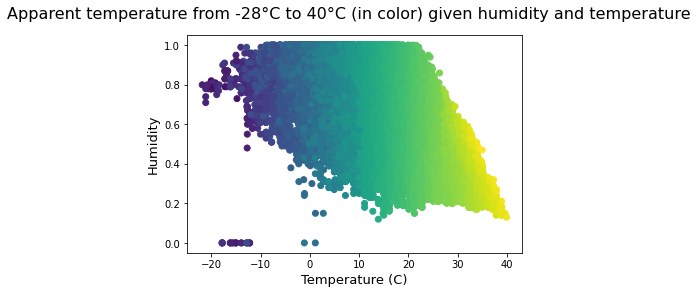

In [12]:
temperature = np.array(df.iloc[:, 3].values) # We select the 3rd column of df, here "temperature"
humidity = np.array(df.iloc[:, 5].values) # We select the 5th column of df, here "humidity"
apparent_temperature = np.array(df.iloc[:, 4].values) # We select the 4th column of df, here "Apparent Temperature"

## Plotting the values
fig = plt.figure()
plt.scatter(temperature, humidity, c = apparent_temperature)
fig.suptitle('Apparent temperature from -28°C to 40°C (in color) given humidity and temperature', fontsize=16)
plt.xlabel('Temperature (C)', fontsize=13)
plt.ylabel('Humidity', fontsize=13)
plt.show()

### **Question 2**

We then implement a cross-validation-check to determine the error for the use of K-NN classification in this case.

In [0]:
def kNN_mean_neighbours(X_train, y_train, X_test, K):
  n = X_test.shape[0]
  y_predict = np.zeros(n)

  # matrix s.t. on the line i we have the list of the indices K closest neighbours of X_i
  for i in range(n):
    neighbours = norm(X_train-X_test[i], axis = 1).argsort()[1:K+1]
    # list of indices of R^2 data points, the first point is i so we do not consider it
     
    y_predict[i] = np.mean(y_train[neighbours.astype('int')]) # get the mean of the neighbours
    
  return y_predict

def CV(X, y, K = 1, nb_folds = 5):
  n = X.shape[0]

  error = np.zeros(nb_folds)

  Xfolds = [X[int(i*n/nb_folds):int((i+1)*n/nb_folds)] for i in range(nb_folds)] # We split X in five shuffled folds with the same amount of elements
  yfolds = [y[int(i*n/nb_folds):int((i+1)*n/nb_folds)] for i in range(nb_folds)] # We take the corresponding y

  for i in range(nb_folds):
    X_test = Xfolds[i]
    y_test = yfolds[i]
    X_train = np.concatenate([Xfolds[j] for j in range(nb_folds) if j != i])
    y_train = np.concatenate([yfolds[j] for j in range(nb_folds) if j != i])
    
    y_pred = kNN_mean_neighbours(X_train, y_train,X_test, K)

    error[i] = np.sum(np.abs(y_test-y_pred))/X_test.shape[0]

  return error

In [14]:
X_unshuffle = np.c_[temperature[:2000], humidity[:2000]]
y_unshuffle = apparent_temperature[:2000]

n = X_unshuffle.shape[0]

shuffle = np.arange(n)
np.random.shuffle(shuffle)

X, y = X_unshuffle[shuffle], y_unshuffle[shuffle]

error = CV(X, y, K = 1, nb_folds = 5)
print(np.mean(error), np.std(error))

0.5621805555555555 0.039095548118885104


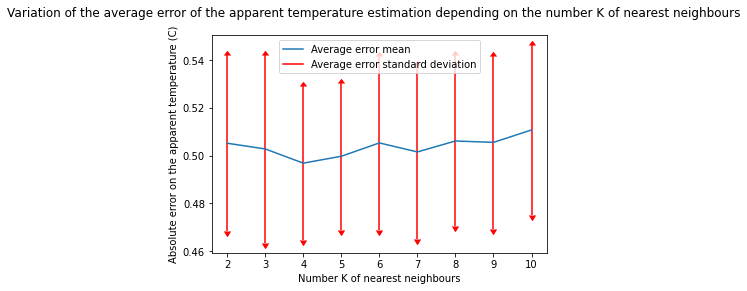

In [15]:
K = range(2, 11)
meanK = np.zeros(len(K))
stdK = np.zeros(len(K))

for index in range(len(K)):
  error = CV(X, y, K[index], 5)
  meanK[index] = np.mean(error)
  stdK[index] = np.std(error)

fig = plt.figure()
fig.suptitle('Variation of the average error of the apparent temperature estimation depending on the number K of nearest neighbours')
plt.errorbar(K, meanK, stdK, uplims=True, lolims=True, ecolor = 'r')
plt.plot([], [], label = "Average error mean")
plt.plot([],[], c='r', label = "Average error standard deviation")
plt.legend()
plt.xlabel('Number K of nearest neighbours')
plt.ylabel('Absolute error on the apparent temperature (C)')
plt.show()

# **3 - k-NN classification:  MNIST dataset**

## **Question 1**

We start by importing the MNIST dataset into the notebook.

In [0]:
import scipy.io
train = scipy.io.loadmat("/content/drive/My Drive/data_app.mat")
test = scipy.io.loadmat("/content/drive/My Drive/data_test.mat")

We then extract the images and the corresponding labels from the created python dictionaries.

In [0]:
images_train = train['x'].astype('float')/255
labels_train = train['S']

images_test = test['x'].astype('float')/255
labels_test = test['S']

We then print the beginning of the data set to make sure we are working on the right data base.

The MNIST dataset


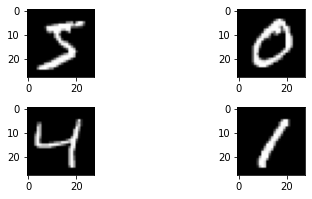

In [18]:
print("The MNIST dataset")

plt.subplot(321)
plt.imshow(images_train[0].reshape(28,28), cmap='gray')

plt.subplot(322)
plt.imshow(images_train[1].reshape(28,28), cmap='gray')

plt.subplot(323)
plt.imshow(images_train[2].reshape(28,28), cmap='gray')

plt.subplot(324)
plt.imshow(images_train[3].reshape(28,28), cmap='gray')

plt.tight_layout()
plt.show()

We then plot the corresponding histograms of the labels to check the distribution of the data (i.e. to check whether the sets are uniformly distributed or not).

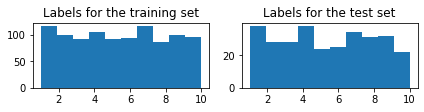

In [19]:
plt.subplot(321)
plt.hist(labels_train)
plt.title("Labels for the training set")

plt.subplot(322)
plt.hist(labels_test)
plt.title("Labels for the test set")

plt.tight_layout()
plt.show()

We can see that the data distribution for the test labels is not quite uniformly distributed (some digits appear a bit more often than others), whereas the labels of the training set tend to be more uniformly distributed. One can assume that the distribution for the test set would be more uniform if it had more samples (300 vs 1000 for the training test).  **Overall, we can then assert that the data is rather uniformly distributed and the labels appear more or less the same number of times.**

### **Question 2**

We try and check the average error for various values of $K$.

In [20]:
X_train = images_train
y_train = labels_train.reshape(-1)
X_test = images_test
y_test = labels_test.reshape(-1)

K = [1, 3, 5]

for k in K:
  labels_pred = kNN(X_train, y_train, X_test, k).astype('int')
  print("Average error for K =", k, ":", np.sum(labels_pred != y_test)/len(y_test))

Average error for K = 1 : 0.25
Average error for K = 3 : 0.22666666666666666
Average error for K = 5 : 0.22


### **Question 3**

The goal here is to plot the confusion matrix.

We start by defining an auxiliary function that gets how the K-NN algorithm classifies each digit with respect to the others.

In [0]:
def list_knn(K, i):
  matrix_i = np.zeros(10)

  indices = [j for j, x in enumerate(y_test) if x == i]
  y_pred_i = kNN(X_train, y_train, X_test[indices], K)
  
  matrix_i[0] = np.sum(y_pred_i == 10)

  for j in range(1, 10):
    matrix_i[j] = np.sum(y_pred_i == j)

  return matrix_i

After doing so, we simply use the previous function to build up the confusion matrix, as it returns the lines of said matrix.

In [0]:
def confusion_matrix(K):
  matrix = np.zeros((10,10))
  
  matrix[0] = list_knn(K, 10)

  for i in range(1, 10):
    matrix[i] = list_knn(K, i)

  return matrix.astype('int')

We can then plot and see the result in a more graphical fashion.

In [23]:
K = [1, 5, 10, 20]

for k in K:
  print("For K =", k, "the confusion matrix is :")
  print(confusion_matrix(k))
  print()

For K = 1 the confusion matrix is :
[[18  0  0  0  0  3  1  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 2  2 17  0  1  2  1  1  1  1]
 [ 0  0  1 16  0  7  0  1  1  2]
 [ 0  3  2  0 22  0  1  1  0  9]
 [ 0  0  0  2  0 19  1  0  2  0]
 [ 1  3  0  0  0  0 21  0  0  0]
 [ 1  0  0  0  2  1  0 26  0  4]
 [ 1  2  1  2  1  2  1  0 19  2]
 [ 0  0  0  0  0  0  0  2  1 29]]

For K = 5 the confusion matrix is :
[[19  0  0  0  0  1  1  0  1  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 2  2 20  0  0  1  0  1  1  1]
 [ 0  1  1 16  0  7  0  1  0  2]
 [ 0  3  1  0 25  0  1  0  0  8]
 [ 1  0  0  1  2 18  0  0  2  0]
 [ 0  4  0  0  0  0 21  0  0  0]
 [ 0  1  0  0  2  2  0 27  0  2]
 [ 0  1  1  4  0  1  1  1 20  2]
 [ 0  0  0  0  0  0  0  1  1 30]]

For K = 10 the confusion matrix is :
[[20  0  0  0  0  1  0  0  1  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 1  5 19  0  0  0  0  1  1  1]
 [ 0  1  1 16  0  6  0  0  1  3]
 [ 0  3  0  0 28  0  1  0  0  6]
 [ 1  0  0  3  1 18  1  0  0  0]
 [ 0  4  0  0  0  0 21  0  0 